## Import libraries

In [92]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## Open image and turn it to grayscale

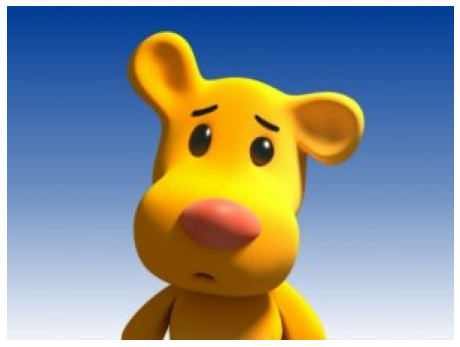

In [93]:
image = Image.open('s.jpg')

img_array = np.array(image)
height, width = img_array.shape[0], img_array.shape[1]

plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(img_array, vmin=0, vmax=255)
plt.show()

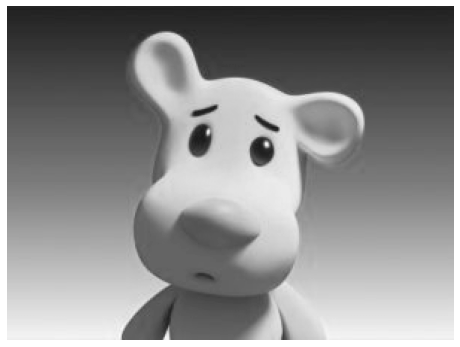

In [94]:
gray = np.zeros((height,width))
for i in range(height):
    for j in range(width):
        gray[i, j] = img_array[i, j][0]*0.6 + img_array[i, j][1]*0.3 + img_array[i, j][2]*0.1

plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.savefig('grayscale.png')
plt.show()

img_array = gray

## Dithering

### Dithering matrix

In [95]:
def dither_matrix(n:int):
    if n == 1:
        return np.array([[0]])
    else:
        first = (n ** 2) * dither_matrix(int(n/2))
        second = (n ** 2) * dither_matrix(int(n/2)) + 2
        third = (n ** 2) * dither_matrix(int(n/2)) + 3
        fourth = (n ** 2) * dither_matrix(int(n/2)) + 1
        first_col = np.concatenate((first, third), axis=0)
        second_col = np.concatenate((second, fourth), axis=0)
        return (1/n**2) * np.concatenate((first_col, second_col), axis=1)


n = 4 
dithering_matrix = dither_matrix(n)* (n**2)
print(dithering_matrix)

[[ 0.  8.  2. 10.]
 [12.  4. 14.  6.]
 [ 3. 11.  1.  9.]
 [15.  7. 13.  5.]]


### Dithering

In [96]:
new_image_arr = np.zeros(img_array.shape, dtype=bool)
dither_size_x, dither_size_y = dithering_matrix.shape[0], dithering_matrix.shape[1]
mapped_image = img_array / 255 * (dither_size_x * dither_size_y - 1)
for i in range(height):
    for j in range(width):
        dithering_value = dithering_matrix[i % dither_size_x, j % dither_size_y]
        new_image_arr[i, j] = 1 if mapped_image[i, j] >= dithering_value else 0

## Save and show results

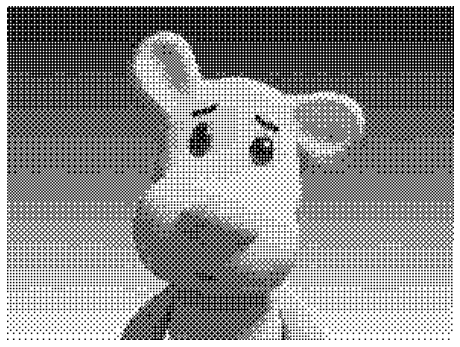

In [97]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(new_image_arr, cmap='gray', vmin=0, vmax=1)
plt.savefig('o_dithered.png')
plt.show()